In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import time

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [411]:
df = pd.read_csv('../Data/Breast_Cancer_Gene_Expression_Profiles.csv', low_memory = False)
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [412]:
clinic_data = df.loc[:, df.columns[:31]]
clinic_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [413]:
genomic_data = df.loc[:, df.columns[31:]]
genomic_data.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,0,0,0,0,0,0,0,0,0,0
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0,0,0,0,0,0,0,0,0,0
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0,0,0,0,0,0,0,0,0,0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,0,0,0,0,0,0,0,0,0,0
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,0,0,0,0,0,0,0,0,0,0


## Detecting Missing Values

### For Genomic Data

In [414]:
missing_genomic = genomic_data.isnull().sum().sort_values(ascending=False).rename('total_null')\
                  .to_frame().sort_values(by='total_null', ascending=False)
missing_genomic.head()

,total_null
brca1,0
rb1,0
rad50,0
palb2,0
pten,0


### For Clinical Data

In [415]:
missing_clinic = clinic_data.isnull().sum().sort_values(ascending=False).rename('total_null')\
                  .to_frame().sort_values(by='total_null', ascending=False)
missing_clinic.head(14)

,total_null
tumor_stage,501
3-gene_classifier_subtype,204
primary_tumor_laterality,106
neoplasm_histologic_grade,72
cellularity,54
mutation_count,45
er_status_measured_by_ihc,30
type_of_breast_surgery,22
tumor_size,20
oncotree_code,15


In [416]:
total = 0
for i in missing_clinic['total_null']:
    total += i
print(total)

1100


In [417]:
clinic_data.shape # 1904 rows and 31 columns

(1904, 31)

## Filling the Missing Values

In the clinical data, it was found that there are 1100 missing values. So we're gonna fill these values instead of dropping them.

In [418]:
for column in missing_clinic.index[:13]:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [419]:
df.isnull().sum().value_counts() # This shows that 693 columns have no missing values

0    693
dtype: int64

In [420]:
df.shape 

(1904, 693)

## Working with the Target Variable

In [421]:
counts = df['death_from_cancer'].value_counts()
print(counts)

Living                  802
Died of Disease         622
Died of Other Causes    480
Name: death_from_cancer, dtype: int64


## Data Division in Ordinal and Nominal

death_from_cancer, gene_classifier_subtype, pr_status, oncotree_code, integrative_cluster, inferred_menopausal_state,
tumor_other_histologic_subtype, her2_status, her2_status_measured_by_snp6, er_status, er_status_measured_by_ihc,
pam50_+_claudin-low_subtype, cellularity, type_of_breast_surgery, cancer_type_detailed

Ordinal:
cellularity, cancer_type_detailed, type_of_breast_surgery, her2_status_measured_by_snp6, pam50_+_claudin-low_subtype,
her2_status_measured_by_snp6, tumor_other_histologic_subtype, integrative_cluster, 3-gene_classifier_subtype,
death_from_cancer

Nominal:
er_status_measured_by_ihc, er_status, her2_status, inferred_menopausal_state, primary_tumor_laterality, pr_status,
oncotree_code

## Label Encoding (Ordinal)

We will use this to change categorical variables into numerical variables by assigning a unique label or number to each category.

The ordinal data is shown below:

In [422]:
ordinal_df = df[['cellularity','cancer_type_detailed','type_of_breast_surgery',
                       'pam50_+_claudin-low_subtype', 'integrative_cluster',
                       'her2_status_measured_by_snp6','tumor_other_histologic_subtype',
                       '3-gene_classifier_subtype', 'death_from_cancer']]
ordinal_df.head()

,cellularity,cancer_type_detailed,type_of_breast_surgery,pam50_+_claudin-low_subtype,integrative_cluster,her2_status_measured_by_snp6,tumor_other_histologic_subtype,3-gene_classifier_subtype,death_from_cancer
0,High,Breast Invasive Ductal Carcinoma,MASTECTOMY,claudin-low,4ER+,NEUTRAL,Ductal/NST,ER-/HER2-,Living
1,High,Breast Invasive Ductal Carcinoma,BREAST CONSERVING,LumA,4ER+,NEUTRAL,Ductal/NST,ER+/HER2- High Prolif,Living
2,High,Breast Invasive Ductal Carcinoma,MASTECTOMY,LumB,3,NEUTRAL,Ductal/NST,ER+/HER2- Low Prolif,Died of Disease
3,Moderate,Breast Mixed Ductal and Lobular Carcinoma,MASTECTOMY,LumB,9,NEUTRAL,Mixed,ER+/HER2- Low Prolif,Living
4,High,Breast Mixed Ductal and Lobular Carcinoma,MASTECTOMY,LumB,9,NEUTRAL,Mixed,ER+/HER2- High Prolif,Died of Disease


In [423]:
ordinal_df = ordinal_df.apply(LabelEncoder().fit_transform)
ordinal_df.head()

,cellularity,cancer_type_detailed,type_of_breast_surgery,pam50_+_claudin-low_subtype,integrative_cluster,her2_status_measured_by_snp6,tumor_other_histologic_subtype,3-gene_classifier_subtype,death_from_cancer
0,0,1,1,6,4,2,0,2,2
1,0,1,0,2,4,2,0,0,2
2,0,1,1,3,3,2,0,1,0
3,2,4,1,3,10,2,4,1,2
4,0,4,1,3,10,2,4,0,0


## One Hot Encoding (Nominal)

We will use it to change each category into a new binary column and assigns a 1 or 0 to each observation in that column. 

The nominal data is shown below:

In [424]:
nominal_df = df[['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code']]
nominal_df.head()

,er_status_measured_by_ihc,er_status,her2_status,inferred_menopausal_state,primary_tumor_laterality,pr_status,oncotree_code
0,Positve,Positive,Negative,Post,Right,Negative,IDC
1,Positve,Positive,Negative,Pre,Right,Positive,IDC
2,Positve,Positive,Negative,Pre,Right,Positive,IDC
3,Positve,Positive,Negative,Pre,Right,Positive,MDLC
4,Positve,Positive,Negative,Post,Right,Positive,MDLC


In [425]:
nominal_df = pd.get_dummies(data = nominal_df, drop_first= True)
nominal_df.head()

,er_status_measured_by_ihc_Positve,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,1,1,0,0,1,0,1,0,0,0,0
1,1,1,0,1,1,1,1,0,0,0,0
2,1,1,0,1,1,1,1,0,0,0,0
3,1,1,0,1,1,1,0,0,0,0,1
4,1,1,0,0,1,1,0,0,0,0,1


## Adding the ordinal_df

We will add the ordinal_df which contains the label encoded data to the original df.

In [426]:
df.drop(ordinal_df.columns, axis = 1, inplace = True)
df = df.join(ordinal_df)
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status,hormone_therapy,...,siah1_mut,cellularity,cancer_type_detailed,type_of_breast_surgery,pam50_+_claudin-low_subtype,integrative_cluster,her2_status_measured_by_snp6,tumor_other_histologic_subtype,3-gene_classifier_subtype,death_from_cancer
0,0,75.65,Breast Cancer,0,1.0,Positve,Positive,3.0,Negative,1,...,0,0,1,1,6,4,2,0,2,2
1,2,43.19,Breast Cancer,0,1.0,Positve,Positive,3.0,Negative,1,...,0,0,1,0,2,4,2,0,0,2
2,5,48.87,Breast Cancer,1,1.0,Positve,Positive,2.0,Negative,1,...,0,0,1,1,3,3,2,0,1,0
3,6,47.68,Breast Cancer,1,1.0,Positve,Positive,2.0,Negative,1,...,0,2,4,1,3,10,2,4,1,2
4,8,76.97,Breast Cancer,1,1.0,Positve,Positive,3.0,Negative,1,...,0,0,4,1,3,10,2,4,0,0


## Adding the nominal_df

We will add the nominal_df which contains the label encoded data to the original df which now contains the ordinal_df.

In [427]:
df.drop(['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code'], axis = 1, inplace = True)
df = df.join(nominal_df)
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,75.65,Breast Cancer,0,1.0,3.0,1,10.0,5.0,6.044,...,1,0,0,1,0,1,0,0,0,0
1,2,43.19,Breast Cancer,0,1.0,3.0,1,0.0,2.0,4.020,...,1,0,1,1,1,1,0,0,0,0
2,5,48.87,Breast Cancer,1,1.0,2.0,1,1.0,2.0,4.030,...,1,0,1,1,1,1,0,0,0,0
3,6,47.68,Breast Cancer,1,1.0,2.0,1,3.0,1.0,4.050,...,1,0,1,1,1,0,0,0,0,1
4,8,76.97,Breast Cancer,1,1.0,3.0,1,8.0,2.0,6.080,...,1,0,0,1,1,0,0,0,0,1


In [428]:
df.isnull().sum().sum()

0

## Rounding Age of Patients

In [429]:
df[['age_at_diagnosis','nottingham_prognostic_index']] = df[['age_at_diagnosis','nottingham_prognostic_index']].apply(np.ceil)

In [430]:
df.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,76.0,Breast Cancer,0,1.0,3.0,1,10.0,5.0,7.0,...,1,0,0,1,0,1,0,0,0,0
1,2,44.0,Breast Cancer,0,1.0,3.0,1,0.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
2,5,49.0,Breast Cancer,1,1.0,2.0,1,1.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
3,6,48.0,Breast Cancer,1,1.0,2.0,1,3.0,1.0,5.0,...,1,0,1,1,1,0,0,0,0,1
4,8,77.0,Breast Cancer,1,1.0,3.0,1,8.0,2.0,7.0,...,1,0,0,1,1,0,0,0,0,1


## Dropping Columns

Since we don't need patient IDs and we already know that the patients have breast cancer, we will drop the columns containing this information.

In [431]:
df.drop(['patient_id','cancer_type'], axis=1, inplace=True)

In [432]:
df.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,76.0,0,1.0,3.0,1,10.0,5.0,7.0,140.500000,1,...,1,0,0,1,0,1,0,0,0,0
1,44.0,0,1.0,3.0,1,0.0,2.0,5.0,84.633333,1,...,1,0,1,1,1,1,0,0,0,0
2,49.0,1,1.0,2.0,1,1.0,2.0,5.0,163.700000,0,...,1,0,1,1,1,1,0,0,0,0
3,48.0,1,1.0,2.0,1,3.0,1.0,5.0,164.933333,1,...,1,0,1,1,1,0,0,0,0,1
4,77.0,1,1.0,3.0,1,8.0,2.0,7.0,41.366667,0,...,1,0,0,1,1,0,0,0,0,1


## Finding Correlation between the Numerical Clinical Data

In [433]:
new_clinic_data = df[df.columns[:25]]
new_clinic_data.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1
0,76.0,0,1.0,3.0,1,10.0,5.0,7.0,140.500000,1,...,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,-0.4294,-1.1201
1,44.0,0,1.0,3.0,1,0.0,2.0,5.0,84.633333,1,...,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,0.5120,0.4390
2,49.0,1,1.0,2.0,1,1.0,2.0,5.0,163.700000,0,...,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,0.2362,-0.1721
3,48.0,1,1.0,2.0,1,3.0,1.0,5.0,164.933333,1,...,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,1.0078,-0.4010
4,77.0,1,1.0,3.0,1,8.0,2.0,7.0,41.366667,0,...,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,-0.2961,0.6320


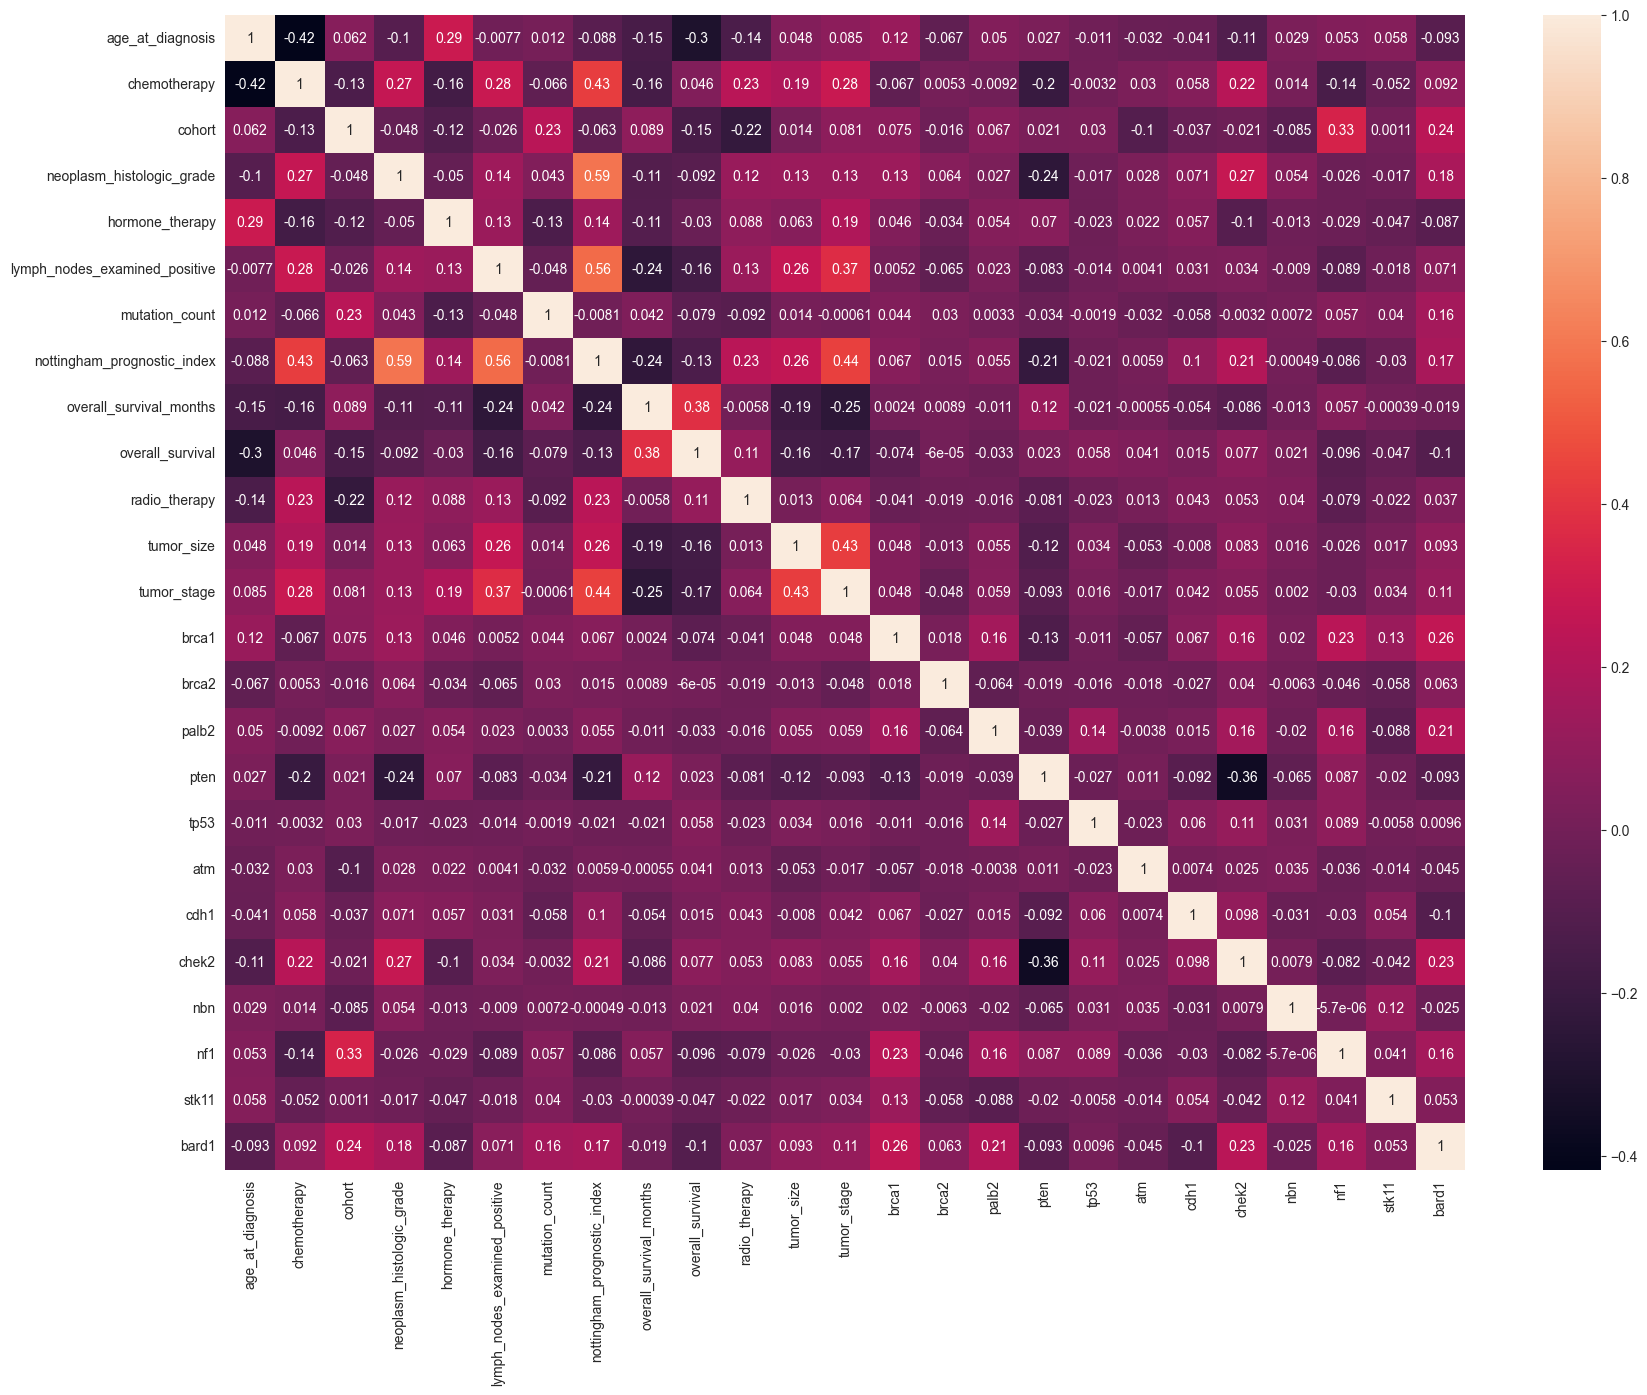

In [434]:
corr_matrix = new_clinic_data.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Finding if the Clinical Data is Linear or not

We will see the relationship between some of the highly correlated features.

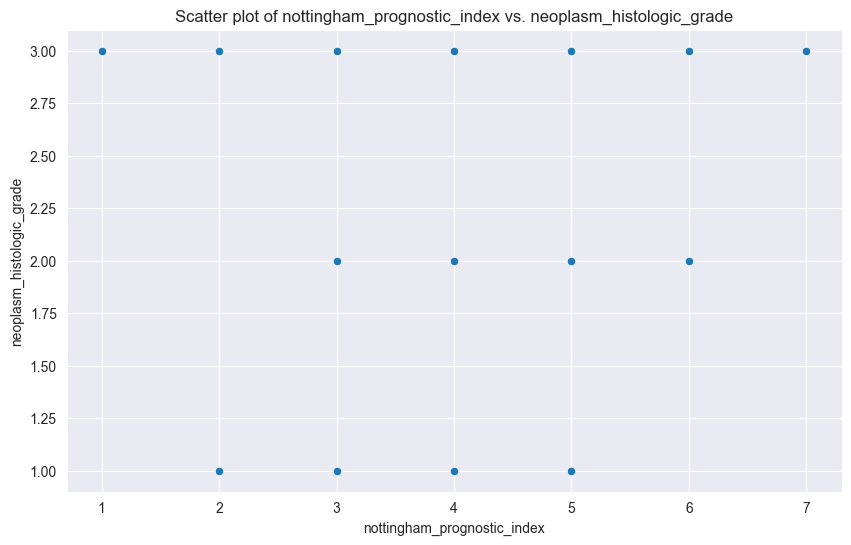

In [435]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

sns.scatterplot(x='nottingham_prognostic_index', y='neoplasm_histologic_grade', data=new_clinic_data)

plt.title('Scatter plot of nottingham_prognostic_index vs. neoplasm_histologic_grade')
plt.xlabel('nottingham_prognostic_index')
plt.ylabel('neoplasm_histologic_grade')

plt.show()


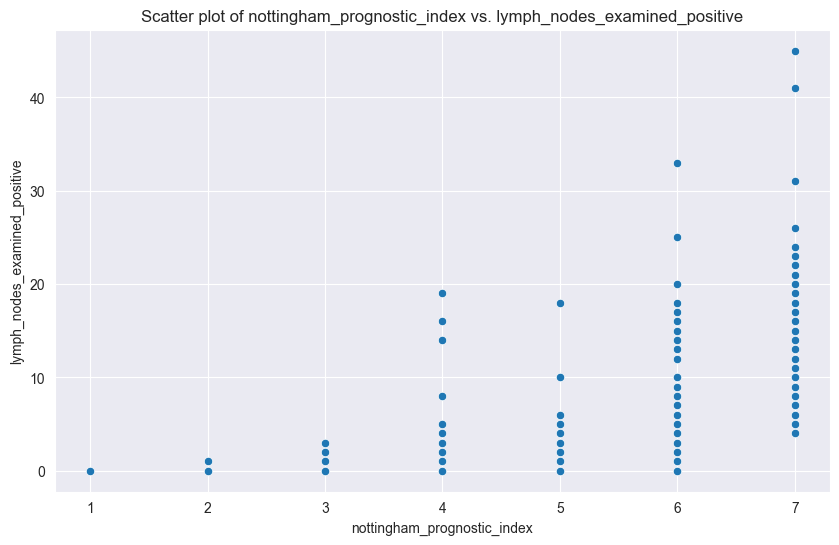

In [436]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

sns.scatterplot(x='nottingham_prognostic_index', y='lymph_nodes_examined_positive', data= new_clinic_data)

plt.title('Scatter plot of nottingham_prognostic_index vs. lymph_nodes_examined_positive')
plt.xlabel('nottingham_prognostic_index')
plt.ylabel('lymph_nodes_examined_positive')

plt.show()


The data is not linear so we cannot apply PCA to it.

## Updating the Dataset

In [437]:
new_df = df.drop(new_clinic_data.columns, axis = 1, inplace = False)
new_df = new_df.join(new_clinic_data)
new_df.isnull().sum().sum()

0

In [438]:
new_df.shape

(1904, 695)

## Genomic Data

In [439]:
genomic_data = new_df.loc[:, new_df.dtypes == object]
genomic_data.head()

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [440]:
# Converting all of the categorical values into binary
genomic_col = genomic_data.columns
for col in genomic_col:
    new_df.loc[new_df[col] != '0', col] = 1
    new_df.loc[new_df[col] == '0', col] = 0
new_df.head()

,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,...,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1
0,-0.4844,-0.7483,-1.6660,-0.1250,-0.3721,-0.6508,-0.1278,1.7330,-0.2770,-1.0673,...,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,-0.4294,-1.1201
1,1.2266,0.7612,0.1821,1.0104,0.5600,-0.4018,-0.2909,0.7440,-1.7488,0.4602,...,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,0.5120,0.4390
2,-1.7910,3.0955,0.6608,2.6127,2.5553,-0.0391,-0.4421,1.4528,1.4142,0.3143,...,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,0.2362,-0.1721
3,-1.3905,4.8798,0.0615,2.9414,4.1161,-0.3098,-1.3470,1.2102,1.5345,-0.6347,...,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,1.0078,-0.4010
4,-0.3582,0.3032,0.8747,0.6323,0.3349,-0.2652,-0.1541,-0.7631,1.0158,1.8996,...,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,-0.2961,0.6320


## Checking correlation for Genomic Data

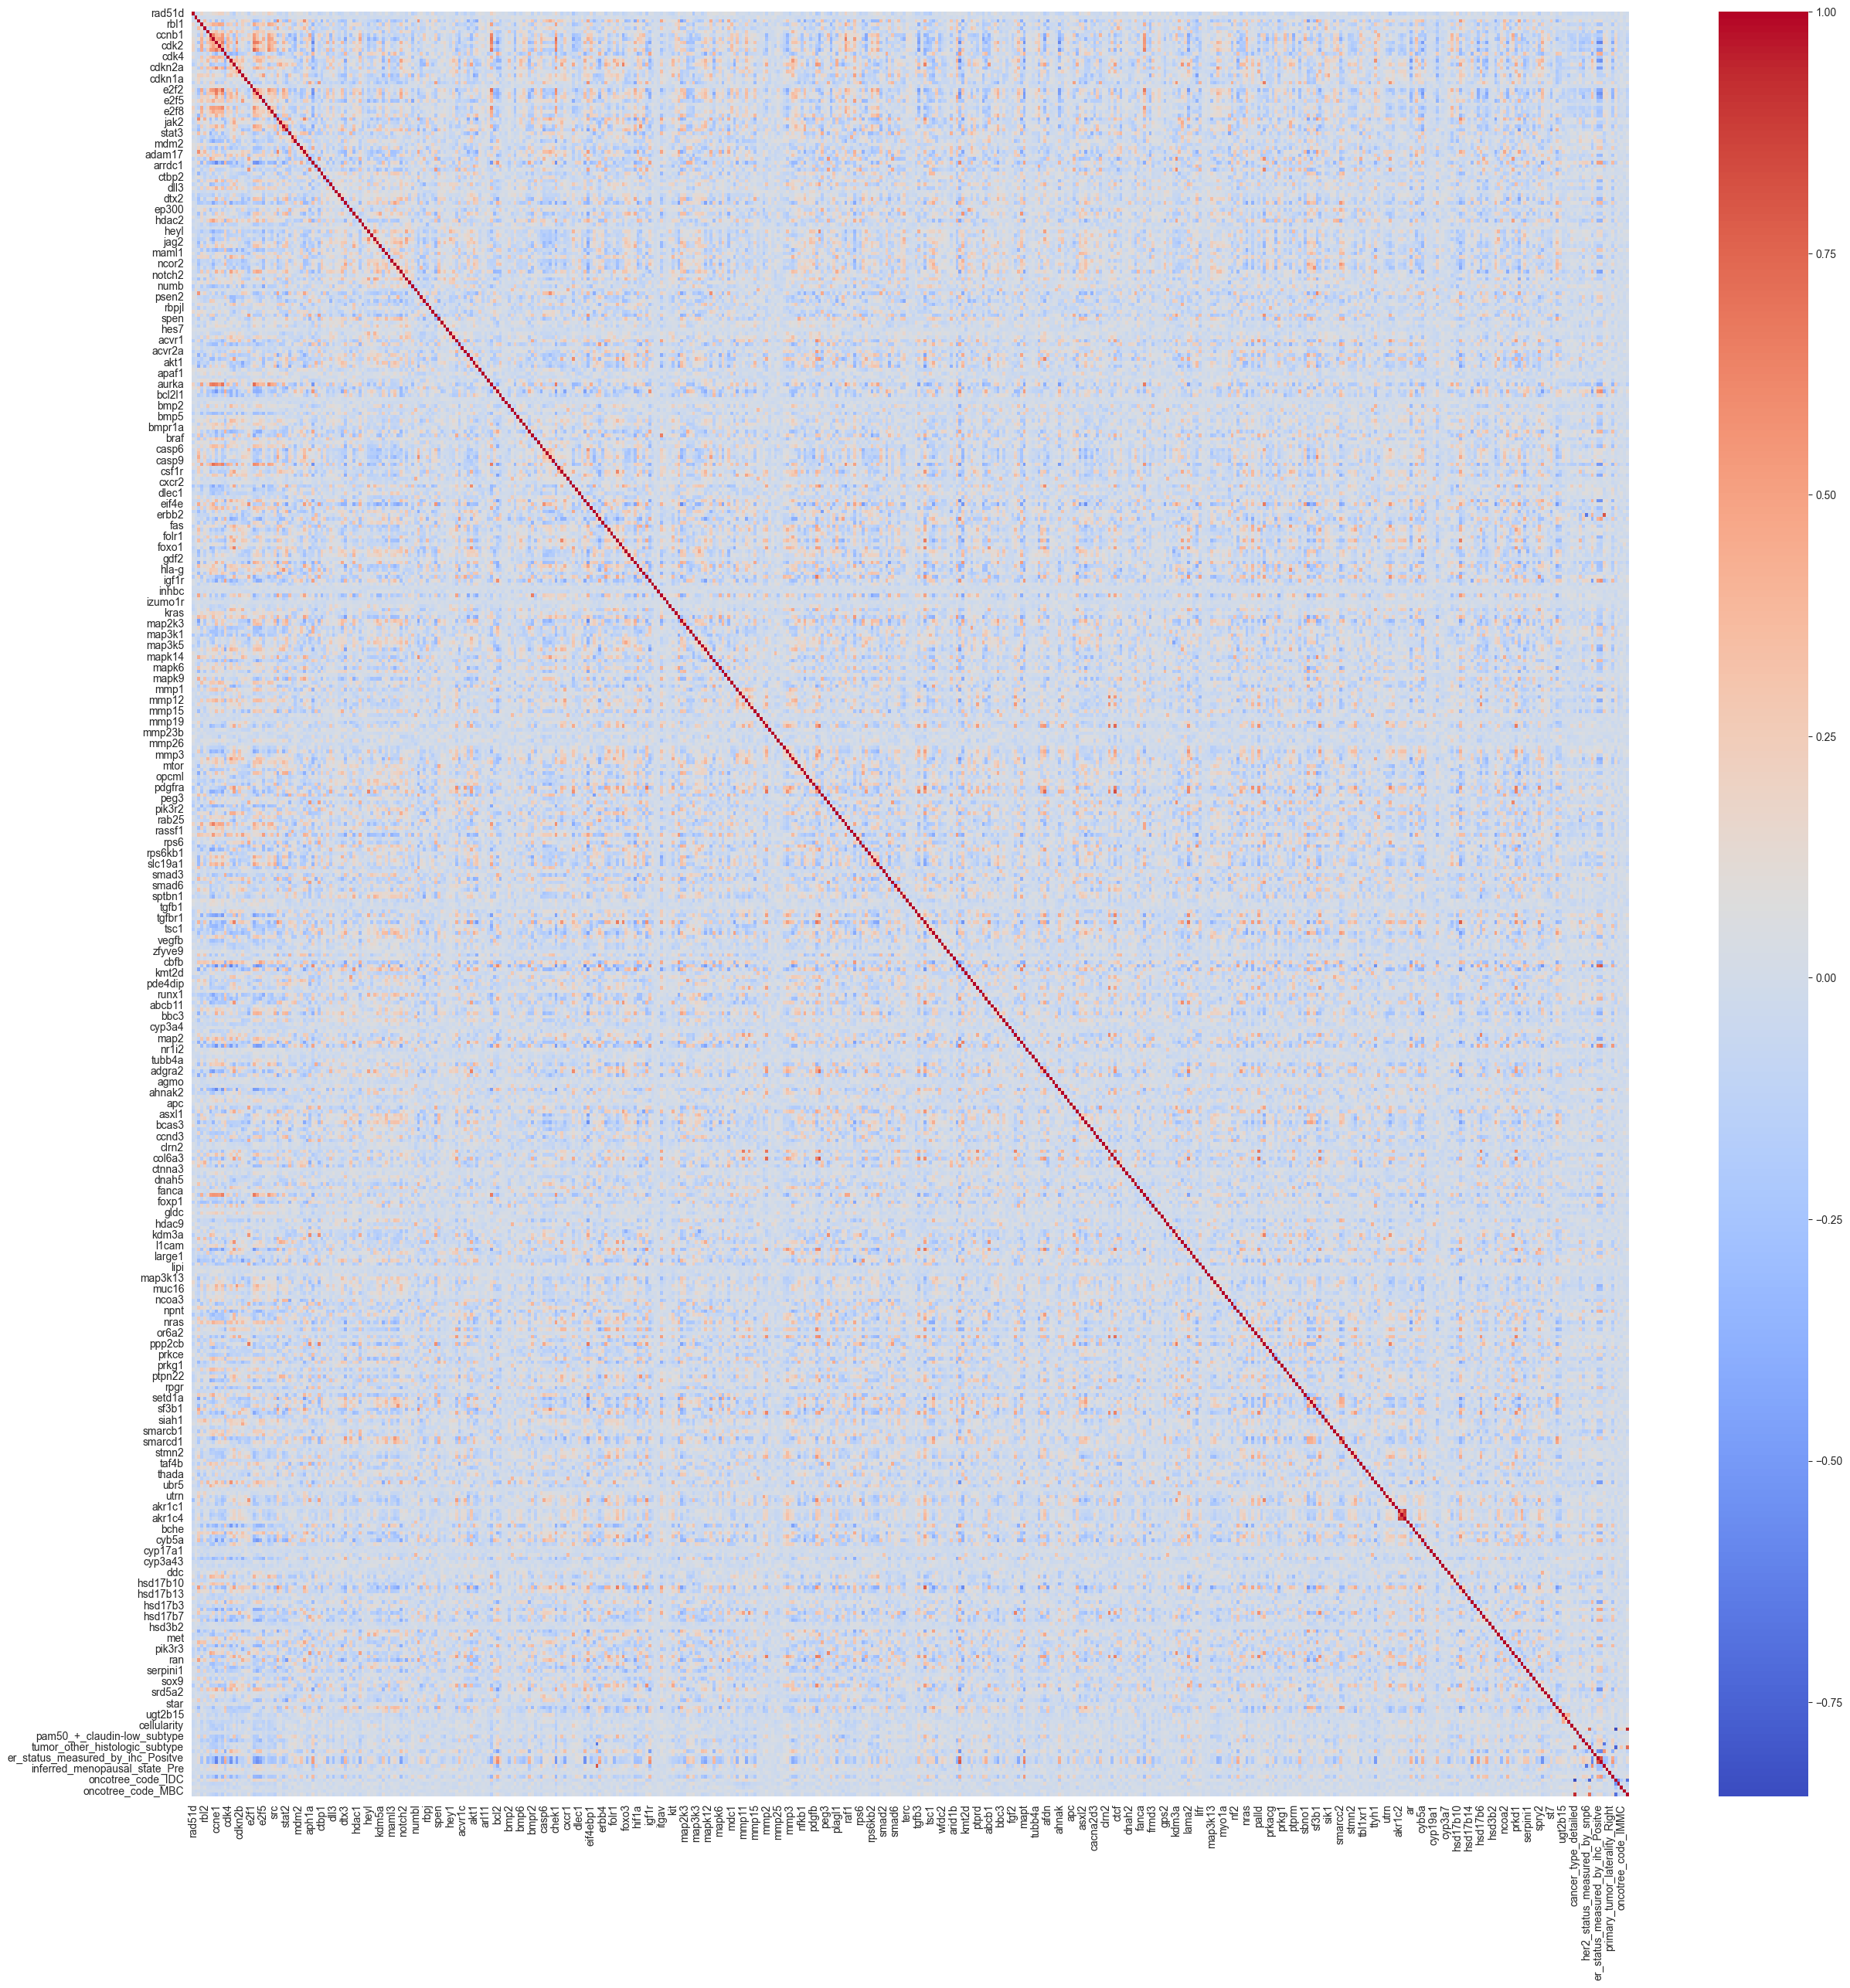

In [441]:
genomic_data = df.loc[:, df.columns[31:]]

corr_matrix = genomic_data.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()


### Checking which features have High Correlation

In [442]:
corr_matrix = genomic_data.corr().abs()
high_corr_features = np.where(corr_matrix > 0.7)
high_corr_features = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]

print("Features with correlation > 0.7:")
for feature_pair in high_corr_features:
    print(feature_pair[0], "-", feature_pair[1])


Features with correlation > 0.7:
cdk1 - chek1
cdc25a - e2f2
e2f2 - aurka
erbb2 - her2_status_Positive
mmp2 - col6a3
pdgfrb - adgra2
pdgfrb - col6a3
tgfbr2 - hsd17b11
gata3 - er_status_measured_by_ihc_Positve
gata3 - er_status_Positive
col12a1 - col6a3
col6a3 - palld
akr1c2 - akr1c4
akr1c3 - akr1c4
cancer_type_detailed - tumor_other_histologic_subtype
cancer_type_detailed - oncotree_code_IDC
cancer_type_detailed - oncotree_code_MDLC
tumor_other_histologic_subtype - oncotree_code_IDC
tumor_other_histologic_subtype - oncotree_code_MDLC
er_status_measured_by_ihc_Positve - er_status_Positive


In [443]:
corr_matrix = genomic_data.corr().abs()
high_corr_features = np.where(corr_matrix > 0.9)
high_corr_features = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]

print("Features with correlation > 0.9:")
for feature_pair in high_corr_features:
    print(feature_pair[0], "-", feature_pair[1])

Features with correlation > 0.9:
cancer_type_detailed - oncotree_code_MDLC


### Checking if Genomic Data is Linear or not

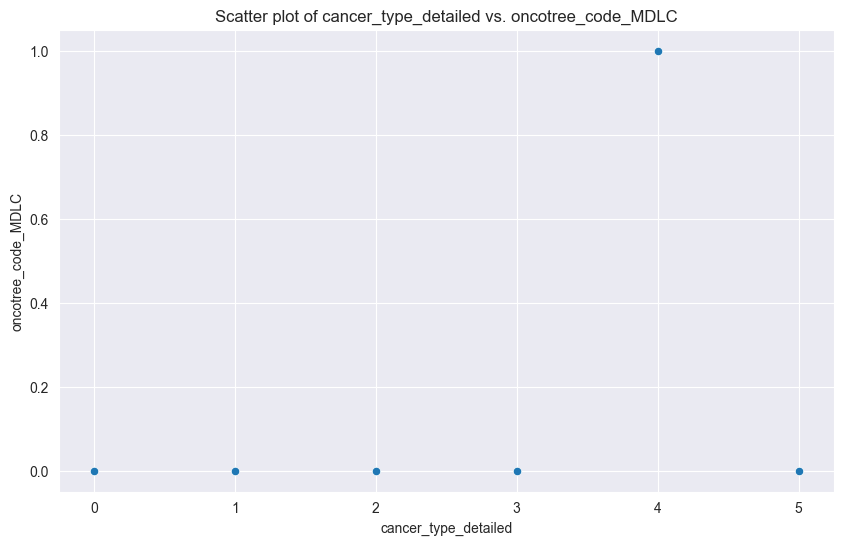

In [444]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

sns.scatterplot(x='cancer_type_detailed', y='oncotree_code_MDLC', data= genomic_data)

plt.title('Scatter plot of cancer_type_detailed vs. oncotree_code_MDLC')
plt.xlabel('cancer_type_detailed')
plt.ylabel('oncotree_code_MDLC')

plt.show()

## Feature Selection for Genomic Data

The features of our genomic part of dataset are too much. We will select the most important features, this way, we can also reduce dimensionality of the dataset.

To do so, we will use a technique called Recursive Feature Elimination. It reduces the dimensionality of a dataset by selecting a subset of the most relevant features. It follows a recursive process that eliminates less important features until a desired number of features is obtained.

In [445]:
X_genomic = new_df[genomic_col].astype('int64')
y = new_df['death_from_cancer']

estimator = RandomForestClassifier(n_estimators=500)
rfe = RFE(estimator=estimator, n_features_to_select=100)

X_genomic_reduced = rfe.fit_transform(X_genomic, y)


In [446]:
print("Feature rankings:")
print(rfe.ranking_)

Feature rankings:
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 15 18  1
  1  1 13  4  1  9 12  6 10  1  1 11  3  8  2  1 21 22 19 29 16 23  5 28
 17 27 24 43 20 33 14 38 31 40 30 39 25 37  7 35 36 32 51 50 34 53 42 41
 26 45 44 60 48 46 59 52 56 61 47 65 55 49 58 54 62 66 73 67 57 64 71 63
 69 70 72 68 74]


### Concatenating the Selected Features with our DF

In [447]:
X_genomic_reduced_df = pd.DataFrame(X_genomic_reduced, columns=X_genomic.columns[rfe.support_])

In [448]:
X_genomic_reduced_df.shape

(1904, 100)

In [449]:
genomic_data = df.loc[:, df.columns[31:]]

new_df.drop(genomic_data, axis=1, inplace=True)


In [450]:
new_df = pd.concat([new_df, X_genomic_reduced_df], axis=1)


In [451]:
new_df.shape

(1904, 131)

## Balancing the Data

Since our dataset was imbalanced, we have to balance it to avoid any bias.The technique we'll be using is ADASYN.

ADASYN (Adaptive Synthetic Sampling) is a method used to balance the class distribution of an imbalanced dataset. 
It generates synthetic samples of the minority class, increasing its representation in the dataset, while not affecting the majority class. ADASYN focuses on the samples that are harder to learn by the classifier by creating more synthetic samples for those data points. This can improve the classifier's accuracy in predicting the minority class.

In [452]:
X = new_df

In [453]:
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

In [454]:
print("Samples per class after ADASYN:")
print(y_resampled.value_counts())

Samples per class after ADASYN:
1    808
2    802
0    706
Name: death_from_cancer, dtype: int64


## Applying MinMax Scaling

We will now apply MinMax Scaling in order to normalize the data so that it can be comparable and consistent across different features and datasets because the features of our datasets have all different scales/units.

In [455]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Model

## Splitting the Data in Training and Testing

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

## Data division in testing and training

**Key**

- 0 means died from cancer
- 1 means died from other disease
- 2 means people who did not die from cancer

In [457]:
train_death_counts = y_train.value_counts()

print(train_death_counts)


1    651
2    630
0    571
Name: death_from_cancer, dtype: int64


In [458]:
death_from_cancer_counts = y_test.value_counts()

print(death_from_cancer_counts)


2    172
1    157
0    135
Name: death_from_cancer, dtype: int64


## Performing Logistic Regression

In [461]:
lr = LogisticRegression()

start_time = time.time()
lr.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
lr_pred = lr.predict(X_test)
testing_time = time.time() - start_time

lr_cm = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
print("Logistic Regression Confusion Matrix:\n", lr_cm)
print("Logistic Regression Classification Report:\n", lr_report)
print("Logistic Regression Train Score:", lr.score(X_train, y_train))
print("Logistic Regression Test Score:", lr.score(X_test, y_test))
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Logistic Regression Confusion Matrix:
 [[ 85  50   0]
 [ 37 120   0]
 [  0   0 172]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.63      0.66       135
           1       0.71      0.76      0.73       157
           2       1.00      1.00      1.00       172

    accuracy                           0.81       464
   macro avg       0.80      0.80      0.80       464
weighted avg       0.81      0.81      0.81       464

Logistic Regression Train Score: 0.847732181425486
Logistic Regression Test Score: 0.8125
Training Time: 0.21 seconds
Testing Time: 0.00 seconds


## Performing Random Forrest Classification

In [462]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()
rfc.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = rfc.predict(X_test)
testing_time = time.time() - start_time


print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

train_score = rfc.score(X_train, y_train)
test_score = rfc.score(X_test, y_test)
print(f"\nTraining Score: {train_score:.2f}")
print(f"Testing Score: {test_score:.2f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Testing Time: {testing_time:.2f} seconds")

Confusion Matrix:
 [[ 96  39   0]
 [ 24 133   0]
 [  0   0 172]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75       135
           1       0.77      0.85      0.81       157
           2       1.00      1.00      1.00       172

    accuracy                           0.86       464
   macro avg       0.86      0.85      0.85       464
weighted avg       0.87      0.86      0.86       464


Training Score: 1.00
Testing Score: 0.86
Training Time: 1.29 seconds
Testing Time: 0.03 seconds


# Results

### Results of Logistic Regression Model:

- The model correctly classified 85 patients with the prognosis that they will die from cancer and they actually did. But for 50 patients, it incorrectly gave the prognosis that they will die from cancer and they did not.
- The model correctly classified 120 patients with the prognosis that they will die from some other disease, not from cancer and they did die from some other disease. But for 37 people, it incorrectly classified them as such.
- The model correctly classified 172 patients with the prognosis that they will not die from cancer and they actually did not die from cancer.

The **train score is 0.847**, which indicates that the model was able to correctly predict the class of 84.7% of the samples in the training set. The **test score is 0.8125**, which indicates that the model was able to correctly predict the class of 81.25% of the samples in the test set.

### Results of Random Forrest Classification Model:

- The model correctly classified 96 patients with the prognosis that they will die from cancer and they actually did. But for 39 patients, it incorrectly gave the prognosis that they will die from cancer and they did not.
- The model correctly classified 133 patients with the prognosis that they will die from some other disease, not from cancer and they did die from some other disease. But for 24 people, it incorrectly classified them as such.
- The model correctly classified 172 patients with the prognosis that they will not die from cancer and they actually did not die from cancer.

The **train score is 1.00**, which indicates that the model was able to correctly predict the class of 100% of the samples in the training set. The **test score is 0.86**, which indicates that the model was able to correctly predict the class of 86% of the samples in the test set.